In [22]:
import numpy as np
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import JordanWignerMapper,BravyiKitaevMapper
from qiskit.circuit import QuantumCircuit, ParameterVector, Parameter

In [23]:
n = 4
N = 2*n
t=1
mu=1.5
U=3

In [24]:
op = FermionicOp(
    {
        "+_0 -_0": 1.0,
        "+_1 -_1": -1.0,
    },
    num_spin_orbitals=2,
)

In [25]:
print(op)

Fermionic Operator
number spin orbitals=2, number terms=2
  1.0 * ( +_0 -_0 )
+ -1.0 * ( +_1 -_1 )


In [26]:
def qOp(i,j,N=8):
    return FermionicOp(
    {
        "+_{i} -_{j}".format(i=i%N,j=j%N): 1.0,
    },
    num_spin_orbitals=N,
)

In [27]:
t_term = 0
mu_term =0
U_term =0
for i in range(n):
    t_term+= qOp(2*i,2*i+2) + qOp(2*i+2,2*i) + qOp(2*i+1,2*i+3) + qOp(2*i+3,2*i+1) 
    mu_term += qOp(2*i,2*i) + qOp(2*i+1,2*i+1)
    U_term += (qOp(2*i,2*i) @ qOp(2*i+1, 2*i+1))
H = U * U_term - mu * mu_term - t * t_term

print(H)

Fermionic Operator
number spin orbitals=8, number terms=28
  3.0 * ( +_0 -_0 +_1 -_1 )
+ 3.0 * ( +_2 -_2 +_3 -_3 )
+ 3.0 * ( +_4 -_4 +_5 -_5 )
+ 3.0 * ( +_6 -_6 +_7 -_7 )
+ -1.5 * ( +_0 -_0 )
+ -1.5 * ( +_4 -_4 )
+ -1.5 * ( +_3 -_3 )
+ -1.5 * ( +_5 -_5 )
+ -1.5 * ( +_1 -_1 )
+ -1.5 * ( +_2 -_2 )
+ -1.5 * ( +_7 -_7 )
+ -1.5 * ( +_6 -_6 )
+ -1.0 * ( +_7 -_1 )
+ -1.0 * ( +_4 -_6 )
+ -1.0 * ( +_2 -_0 )
+ -1.0 * ( +_1 -_3 )
+ -1.0 * ( +_3 -_1 )
+ -1.0 * ( +_3 -_5 )
+ -1.0 * ( +_5 -_3 )
+ -1.0 * ( +_7 -_5 )
+ -1.0 * ( +_0 -_6 )
+ -1.0 * ( +_0 -_2 )
+ -1.0 * ( +_4 -_2 )
+ -1.0 * ( +_1 -_7 )
+ -1.0 * ( +_5 -_7 )
+ -1.0 * ( +_6 -_0 )
+ -1.0 * ( +_6 -_4 )
+ -1.0 * ( +_2 -_4 )


In [28]:
mapper = JordanWignerMapper()
qubit_jw_op = mapper.map(H)
print(qubit_jw_op)

SparsePauliOp(['IIIIIIII', 'IIIIIIZZ', 'IIIIZZII', 'IIZZIIII', 'ZZIIIIII', 'XZZZZZXI', 'YZZZZZYI', 'IYZYIIII', 'IXZXIIII', 'IIIIIXZX', 'IIIIIYZY', 'IIIIYZYI', 'IIIIXZXI', 'IIYZYIII', 'IIXZXIII', 'XZXIIIII', 'YZYIIIII', 'IYZZZZZY', 'IXZZZZZX', 'IIIXZXII', 'IIIYZYII'],
              coeffs=[-3.  +0.j,  0.75+0.j,  0.75+0.j,  0.75+0.j,  0.75+0.j, -0.5 +0.j,
 -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j,
 -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j,
 -0.5 +0.j, -0.5 +0.j, -0.5 +0.j])


In [75]:
from qiskit.algorithms import NumPyEigensolver
from qiskit.visualization import plot_histogram
from qiskit.opflow.primitive_ops import PauliSumOp, PauliOp

# find the first three (k=3) eigenvalues
exact_solver = NumPyEigensolver(k=1)
qubit_jw_op1 = PauliSumOp(qubit_jw_op)
exact_result = exact_solver.compute_eigenvalues(qubit_jw_op1)

# Save ground state energy for later
gs_energy = np.round(exact_result.eigenvalues[0], 4)

gvec = exact_result.eigenstates[0].primitive.data

print(bin(np.argmax(gvec)))
for i,g in enumerate(gvec):
    if np.abs(g) > 1e-15:
        print(bin(i))
        print(bin(i).count("1")) #counts the number of filled orbitals

0b10100101
0b1111
4
0b11011
4
0b100111
4
0b110110
4
0b111001
4
0b111100
4
0b1001110
4
0b1011010
4
0b1100011
4
0b1100110
4
0b1101001
4
0b1101100
4
0b1110010
4
0b10001101
4
0b10010011
4
0b10010110
4
0b10011001
4
0b10011100
4
0b10100101
4
0b10110001
4
0b11000011
4
0b11000110
4
0b11001001
4
0b11011000
4
0b11100100
4
0b11110000
4


/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_11925/2554004513.py:6: DeprecationWarning: The class ``qiskit.algorithms.eigen_solvers.numpy_eigen_solver.NumPyEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.eigensolvers.NumPyEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  exact_solver = NumPyEigensolver(k=1)
/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_11925/2554004513.py:7: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  qubit_jw_op1 = PauliSumOp(qubit_jw_op)


In [30]:
print(gs_energy)

-8.4244


In [61]:
from qiskit_algorithms import VQE
from qiskit.primitives import Estimator, Sampler
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.optimizers import SPSA, COBYLA, QNSPSA, SLSQP

n = qubit_jw_op.num_qubits
est = Estimator()
ansatz = EfficientSU2(n)
optimizer = SPSA(maxiter = 500)
intermediate_info = []
params_info = []
def callback(eval_count,params,value,meta):
        intermediate_info.append(value)
        params_info.append(params)

vqe = VQE(est,ansatz,optimizer,callback = callback)


In [32]:
eigen = vqe.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue

In [33]:
print(eigen)

-6.615313024944519


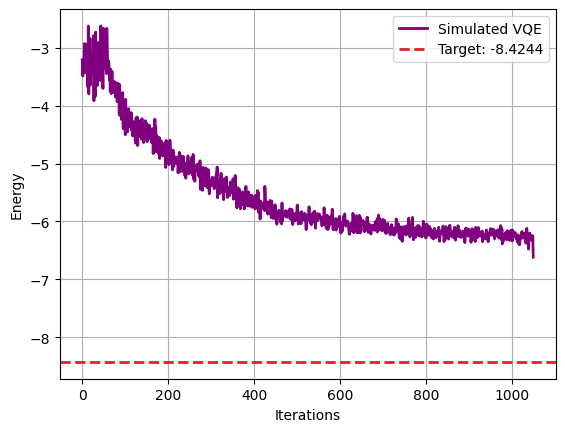

In [34]:
import matplotlib.pyplot as plt
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

# Ansatz From: https://arxiv.org/pdf/2112.14077

## Notes:
start2: -7.4 descent
start: barren plateau around -4

In [76]:
from qiskit.circuit.library import SwapGate
from scipy.linalg import expm
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import HamiltonianGate

#eZZ gate
theta = 0.7809
Smat = SwapGate().to_matrix()
Sop = Operator(SwapGate())
#print(Sop)
#expS = expm(1j*Smat)
#def expSt(t):
#    return np.power(expS,t)

def eSwap(circ,i,j,t):
    eSt = HamiltonianGate(Sop,t,label = "eSwap")
    circ.append(eSt,[i,j])


def eZZ(circ,i,j,t):
    circ.cx(i,j)
    circ.rz(t,j)
    circ.cx(i,j)

def fij(circ,i,j,t):
    eSwap(circ,i,j,t)
    circ.cp(t,i,j)

def efSwap(circ,i,j,t):
    for k in range(j-1,i,-1):
        circ.cz(j,k)
    fij(circ,i,j,t)
    for k in range(i+1,j,1):
        circ.cz(j,k)

def hopping(circ,r):
    n = circ.num_qubits
    t_s = ParameterVector("t_h{r}".format(r=r),length = n)
    for i in range(n):
        efSwap(circ,i,(i+2)%n,t_s[i])

def interaction(circ,r):
    n = circ.num_qubits
    t_s = ParameterVector("t_i{r}".format(r=r),length = n//2)
    for i in range(0,n,2):
        eZZ(circ,i,i+1,t_s[i//2])

li = [0,1,4,5]
def start(circ):
    n = circ.num_qubits
    for i in li:
        circ.x(i)
        circ.h(i+2)
        circ.cx(i,i+2)
    circ.barrier()

def start2(circ):
    li = [0,2,5,7]
    circ.x(li)

def hopint(circ,reps = 3):
    for r in range(reps):
        hopping(circ,r)
        interaction(circ,r)
    

In [77]:
circ = QuantumCircuit(N)
start2(circ)
hopint(circ,reps = 5)
circ.draw(style = "mpl")


┌───┐   ┌────────┐                                                »
q_0: ┤ X ├───┤0       ├─■──────────────────────────────────────────────»
     └───┘   │        │ │                 ┌────────┐                   »
q_1: ──────■─┤  eSwap ├─┼────────────■────┤0       ├─■─────────────────»
     ┌───┐ │ │        │ │P(t_h0[0])  │    │        │ │                 »
q_2: ┤ X ├─■─┤1       ├─■────────────■──■─┤  eSwap ├─┼────────────■────»
     └───┘   └────────┘                 │ │        │ │P(t_h0[1])  │    »
q_3: ───────────────────────────────────■─┤1       ├─■────────────■──■─»
                                          └────────┘                 │ »
q_4: ────────────────────────────────────────────────────────────────■─»
     ┌───┐                                                             »
q_5: ┤ X ├─────────────────────────────────────────────────────────────»
     └───┘                                                             »
q_6: ──────────────────────────────────────────────────────────────────»
     ┌───┐                                                             »
q_7: ┤ X ├─────────────────────────────────────────────────────────────»
     └───┘                                                             »
«                                                                             »
«q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_1: ────────────────────────────────────────────────────────────────────────»
«     ┌────────┐                                                              »
«q_2: ┤0       ├─■──────────────────────────────────────────■─────────────────»
«     │        │ │                 ┌────────┐             ┌─┴─┐┌─────────────┐»
«q_3: ┤  eSwap ├─┼────────────■────┤0       ├─■───────────┤ X ├┤ Rz(t_i0[1]) ├»
«     │        │ │P(t_h0[2])  │    │        │ │           └───┘└─────────────┘»
«q_4: ┤1       ├─■────────────■──■─┤  eSwap ├─┼─────────────■─────────────────»
«     └────────┘                 │ │        │ │P(t_h0[3])   │                 »
«q_5: ───────────────────────────■─┤1       ├─■─────────────■─────────■───────»
«                                  └────────┘                         │       »
«q_6: ────────────────────────────────────────────────────────────────■───────»
«                                                                             »
«q_7: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«                                                              ┌────────┐»
«q_0: ─────────────────────────────────────────────────────────┤1       ├»
«                                                              │        │»
«q_1: ─────────────────────────────────────────────────────────┤        ├»
«                                                              │        │»
«q_2: ────■────────────────────────────────────────────────────┤        ├»
«       ┌─┴─┐                                                  │        │»
«q_3: ──┤ X ├──────────────────────────────────────────────────┤  eSwap ├»
«     ┌─┴───┴──┐                                               │        │»
«q_4: ┤0       ├─■──────────────────────────────────────────■──┤        ├»
«     │        │ │                 ┌────────┐             ┌─┴─┐│        │»
«q_5: ┤  eSwap ├─┼────────────■────┤0       ├─■───────────┤ X ├┤        ├»
«     │        │ │P(t_h0[4])  │    │        │ │           └───┘│        │»
«q_6: ┤1       ├─■────────────■──■─┤  eSwap ├─┼─────────────■──┤0       ├»
«     └────────┘                 │ │        │ │P(t_h0[5])   │  └────────┘»
«q_7: ───────────────────────────■─┤1       ├─■─────────────■────────────»
«                                  └────────┘                            »
«                                                                            »
«q_0: ──────────────────────────■─────────────────

In [78]:
ans1 = circ
print(ans1.parameters)

ParameterView([ParameterVectorElement(t_h0[0]), ParameterVectorElement(t_h0[1]), ParameterVectorElement(t_h0[2]), ParameterVectorElement(t_h0[3]), ParameterVectorElement(t_h0[4]), ParameterVectorElement(t_h0[5]), ParameterVectorElement(t_h0[6]), ParameterVectorElement(t_h0[7]), ParameterVectorElement(t_h1[0]), ParameterVectorElement(t_h1[1]), ParameterVectorElement(t_h1[2]), ParameterVectorElement(t_h1[3]), ParameterVectorElement(t_h1[4]), ParameterVectorElement(t_h1[5]), ParameterVectorElement(t_h1[6]), ParameterVectorElement(t_h1[7]), ParameterVectorElement(t_h2[0]), ParameterVectorElement(t_h2[1]), ParameterVectorElement(t_h2[2]), ParameterVectorElement(t_h2[3]), ParameterVectorElement(t_h2[4]), ParameterVectorElement(t_h2[5]), ParameterVectorElement(t_h2[6]), ParameterVectorElement(t_h2[7]), ParameterVectorElement(t_h3[0]), ParameterVectorElement(t_h3[1]), ParameterVectorElement(t_h3[2]), ParameterVectorElement(t_h3[3]), ParameterVectorElement(t_h3[4]), ParameterVectorElement(t_h3[

In [85]:
sampler = Sampler()
param_count = ans1.num_parameters
initial_point = np.random.random(param_count)*np.pi
fidelity = QNSPSA.get_fidelity(ans1, sampler = sampler)
optimizer = QNSPSA(fidelity,maxiter = 100)
optimizer = COBYLA(maxiter = 500)
intermediate_info = []
params_info = []
vqe1 = VQE(est,ans1,optimizer,callback = callback,initial_point = initial_point)
eigen = vqe1.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue
print(eigen)

-7.63717949113233


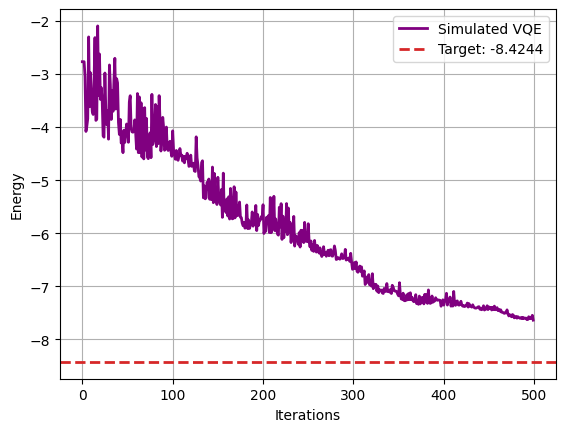

In [86]:
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()